In [1]:
from eval.trainVAE import VAEEval
v = VAEEval()

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN,Birch
from sklearn.metrics import calinski_harabasz_score

In [3]:
fe = v.feature_extractor
data = v.data_set.ext_df.tolist()
_pred = v.data_set.tag_ids.tolist()
ori = v.data_set.ori_df

In [4]:
import matplotlib.pyplot as plt


Bad key text.latex.preview in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Bad key mathtext.fallback_to_cm in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Bad key savefig.jpeg_quality in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

In [11]:
ls = ori.iloc[:,7].apply(lambda x:len(eval(x)))

In [27]:
ls.quantile(0.99)

17.0

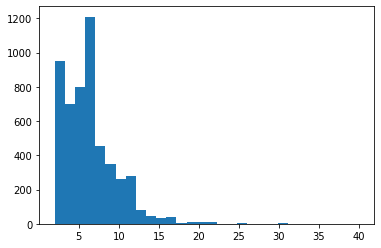

In [20]:
plt.hist(ls,bins=30)
plt.savefig('./goal_freq.svg',format='svg')

In [24]:
(ori.iloc[:,5].apply(lambda x:len(x.split())) / ori.iloc[:,0].apply(lambda x:len(x.split())) *2 ).mean()

0.24582305778218305

In [16]:
v.data_set.ori_df.iloc[0,7]

"[('enables', 'you'), ('retrieve', 'a Frame.io authenticated user'), ('enables', 'teams'), ('add', 'a collaborator'), ('using', 'a GET/POST request'), ('supports', 'SSL'), ('requires', 'a Bearer Token'), ('provides', 'professional video review and collaboration support'), ('provides', 'video teams'), ('track', 'the creative process'), ('track', 'a single workbench'), ('built', 'real working video creators')]"

In [ ]:
v.query_ext([v.data_set.pos[1][0]])

In [ ]:
v.data_set.ext_df.iloc[0]

In [ ]:
v.data_set.raw_ids.iloc[0]

In [4]:
v.train()

epoch:0,loss:38540489.5
tensor(544.8157, device='cuda:0', grad_fn=<SumBackward0>)
epoch:1,loss:38540407.5
epoch:2,loss:38540401.0
epoch:3,loss:38540399.0
epoch:4,loss:38540398.0
epoch:5,loss:38540396.5
epoch:6,loss:38540395.5
epoch:7,loss:38540395.5
epoch:8,loss:38540395.5
epoch:9,loss:38540395.5
epoch:10,loss:38540395.5
tensor(546.5048, device='cuda:0', grad_fn=<SumBackward0>)
epoch:11,loss:38540395.5
epoch:12,loss:38540395.5
epoch:13,loss:38540395.5
epoch:14,loss:38540395.5
epoch:15,loss:38540395.5
epoch:16,loss:38540395.5
epoch:17,loss:38540395.5
epoch:18,loss:38540395.5
epoch:19,loss:38540395.5
epoch:20,loss:38540395.5
tensor(547.2348, device='cuda:0', grad_fn=<SumBackward0>)
epoch:21,loss:38540395.5
epoch:22,loss:38540395.5
epoch:23,loss:38540395.5
epoch:24,loss:38540395.5
epoch:25,loss:38540395.5
epoch:26,loss:38540395.5
epoch:27,loss:38540395.5
epoch:28,loss:38540395.5
epoch:29,loss:38540395.5
epoch:30,loss:38540395.5
tensor(544.4799, device='cuda:0', grad_fn=<SumBackward0>)
epo

In [5]:

# _,theta,*_ = fe(data,pred=_pred)
_,theta,*_ = fe(data)

In [6]:
def do_tsne(X):
    tsne = TSNE(n_components=2)
    new_x = tsne.fit_transform(X)
    return new_x,tsne

In [7]:
t,tsne = do_tsne(theta.cpu().detach())

Bad key text.latex.preview in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Bad key mathtext.fallback_to_cm in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution
Bad key savefig.jpeg_quality in file /home/ubuntu/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality p

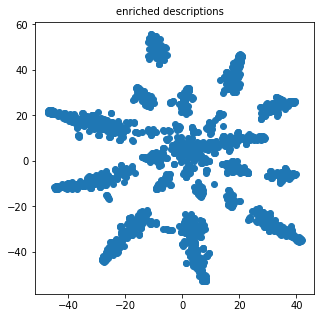

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'enriched descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1])
fig.show()


In [9]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans()
db = DBSCAN()

In [10]:
r1 = km.fit_predict(t)
r2 = db.fit_predict(theta.cpu().detach())

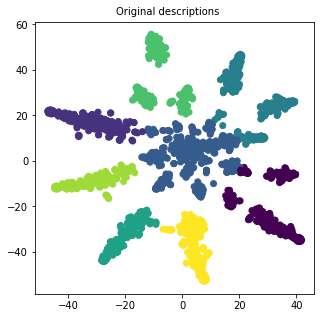

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1],c=r1)

fig.show()
fig.savefig('enriched descriptions.svg')

In [12]:
from sklearn import metrics 
metrics.calinski_harabasz_score(t,r1)

2086.447928210787

In [ ]:
ori[r1==1]

In [ ]:
from eval.TagLSTMEval_topic import LSTMEval
model = LSTMEval()

In [ ]:
model.train()

In [ ]:
torch.autograd.set_grad_enabled(False)

for id1,id2,l in model.train_data_loader:
    break
in1 = model.get_BoWs(id1)    
in2 = model.ext_df[id2]
text2 = model.data_set[id2]

In [ ]:
positives = torch.sort(l,descending=True)[1]

In [ ]:
import torch
f1,w1 = model.feature_extractor([torch.LongTensor(s) for s in id1],in1,model.vae)

In [ ]:
k = positives[2].item()
w1[k]

In [ ]:
[model.di.id2token[_i] for _i in id1[k]]

In [ ]:
f2,w2 = model.feature_extractor(text2,in2,model.vae)

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k].numpy().tolist()]

In [ ]:
word_mask = (w2[k]>0.5).squeeze()[:len(text2.iloc[k])]

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k][word_mask].numpy().tolist()]

In [ ]:
model.cos(f1,f2)[k]

In [ ]:
for id1 in model.test_keys:
    break
pos = list(model.data_set.pos[id1][1])
text_bow = model.get_BoWs([model.data_set.pos[id1][0]])
text = [torch.LongTensor(model.data_set.pos[id1][0])]

In [ ]:
[model.di.id2token[_i] for _i in text[0].numpy()]

In [ ]:
all_f = []
for _ids in model.ids_loader:
    _t = model.data_set[_ids.cpu().numpy()]
#   _b = self.bow[_ids.cpu().numpy()]
    _b = model.ext_df[_ids.cpu().numpy()]
    _f,*_ = model.feature_extractor(_t,_b,model.vae)

    all_f.append(_f.cpu())
all_f = torch.cat(all_f,dim = 0).view(len(model.data_set),-1)

In [ ]:
torch.cuda.empty_cache()